In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn import tree
import seaborn as sns

In [2]:
df = pd.read_csv("heart_disease_data.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


- In target, 0 represent if person has heart disease and 1 represent if person has no heart disease.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()               # Checking for missing values in df

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- We don't have any missing values

### Understanding the columns

In [5]:
info = ["age","1: male, 0: female","chest pain type = 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t"+info[i])

age:		age
sex:		1: male, 0: female
cp:		chest pain type = 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:		resting blood pressure
chol:		 serum cholestoral in mg/dl
fbs:		fasting blood sugar > 120 mg/dl
restecg:		resting electrocardiographic results (values 0,1,2)
thalach:		 maximum heart rate achieved
exang:		exercise induced angina
oldpeak:		oldpeak = ST depression induced by exercise relative to rest
slope:		the slope of the peak exercise ST segment
ca:		number of major vessels (0-3) colored by flourosopy
thal:		thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [6]:
# Statisctical measures of data

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

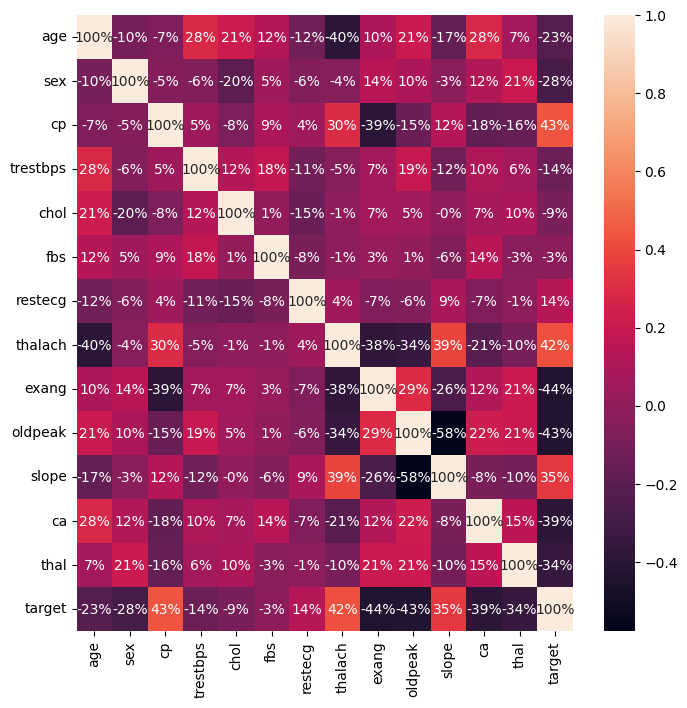

In [7]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot = True, fmt = '.0%')

- All the columns are moderately correlated

### Exploratory Data Analysis

In [8]:
# Checking value distribution

target_vals = df['target'].value_counts()
target_vals

target
1    165
0    138
Name: count, dtype: int64

In [9]:
print(target_vals[0], target_vals[1])

138 165


In [10]:
print("Percentage of patients without heart disease: " , round(target_vals[0]/len(df.target), 2)*100)
print("Percentage of patients with heart disease: " , round(target_vals[1]/len(df.target), 2)*100)

Percentage of patients without heart disease:  46.0
Percentage of patients with heart disease:  54.0


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

In [11]:
target = df['target']

#### Analysing 'sex' column

In [12]:
df["sex"].unique()

array([1, 0], dtype=int64)

In [13]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='target'>

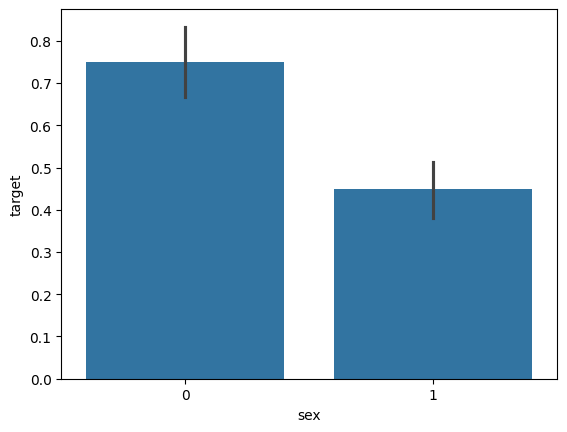

In [14]:
sns.barplot(x = df['sex'], y = target, data = df)

##### From above, we notice that females are more likely to have heart disease than males

### Analysing 'Chest Pain Type (cp)' column/feature

In [15]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [16]:
df['cp'].value_counts()                 

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='target'>

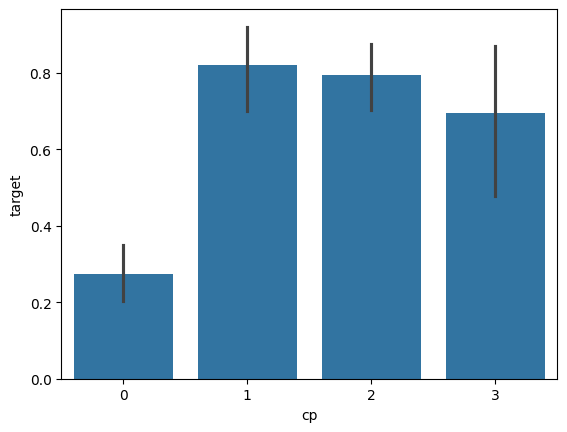

In [17]:
sns.barplot(x = df['cp'], y='target', data=df)

#### From this, we can see that the patients with typical angina are less likely to have heart disease


### Analysing 'fbs' column/feature

In [18]:
df['fbs'].unique()

array([1, 0], dtype=int64)

In [19]:
df['fbs'].value_counts()

fbs
0    258
1     45
Name: count, dtype: int64

<Axes: xlabel='fbs', ylabel='target'>

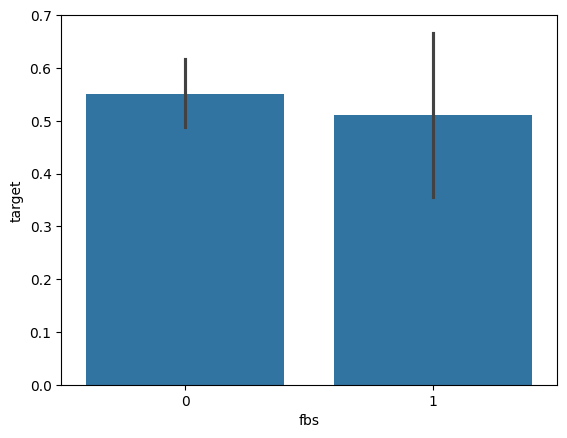

In [20]:
sns.barplot(x = df['fbs'], y = target, data = df)

#### From this, we can see that the patients with fasting blood sugar > 120 mg/dl are less likely to have heart disease

### Analysing restecg column/feature

In [21]:
df['restecg'].unique()

array([0, 1, 2], dtype=int64)

In [22]:
df['restecg'].value_counts()

restecg
1    152
0    147
2      4
Name: count, dtype: int64

<Axes: xlabel='restecg', ylabel='target'>

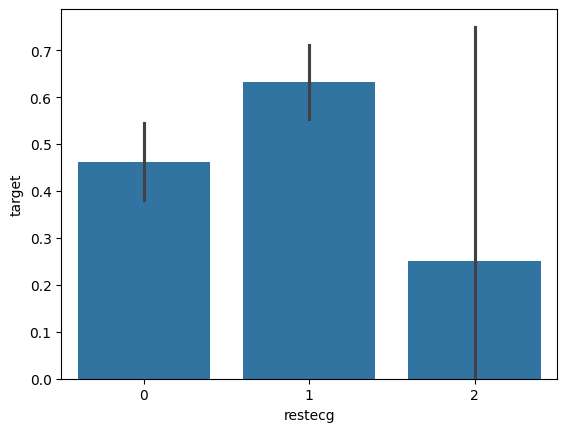

In [23]:
sns.barplot(x = df['restecg'], y = target, data = df)

#### We realize that people with resting electrocardiographic of 0 or 1 are more likely to have heart disease than people with resting electrocardiographic of 2

### Analysing 'exang' column/feature

In [24]:
df['exang'].unique()

array([0, 1], dtype=int64)

In [25]:
df['exang'].value_counts()

exang
0    204
1     99
Name: count, dtype: int64

<Axes: xlabel='exang', ylabel='target'>

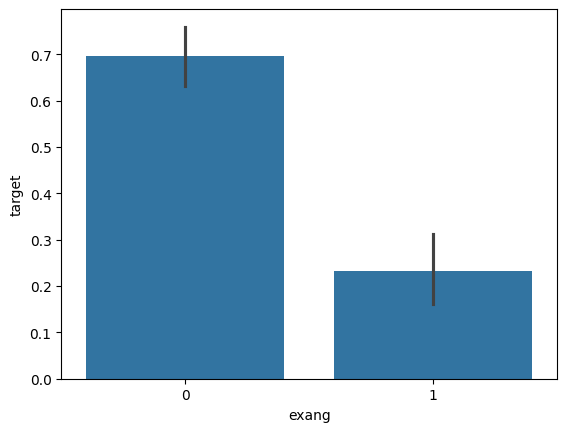

In [26]:
sns.barplot(x = df['exang'], y = target, data = df)

#### We realize that people with exercise induced angina are less likely to have heart disease

### Analysing 'slope' column/feature

In [27]:
df['slope'].unique()

array([0, 2, 1], dtype=int64)

In [28]:
df['slope'].value_counts()

slope
2    142
1    140
0     21
Name: count, dtype: int64

<Axes: xlabel='slope', ylabel='target'>

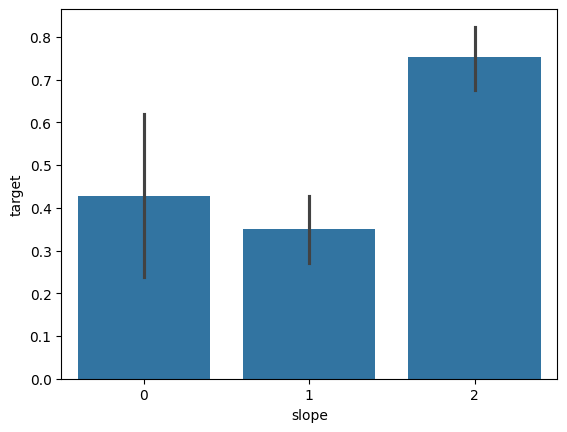

In [29]:
sns.barplot(x = df['slope'], y = target, data=df)

#### We observe that slope '2' causes heart pain much more than '1' and '0'

### Analysing ca column/feature

In [30]:
df['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [31]:
df['ca'].value_counts()

ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

<Axes: xlabel='ca', ylabel='target'>

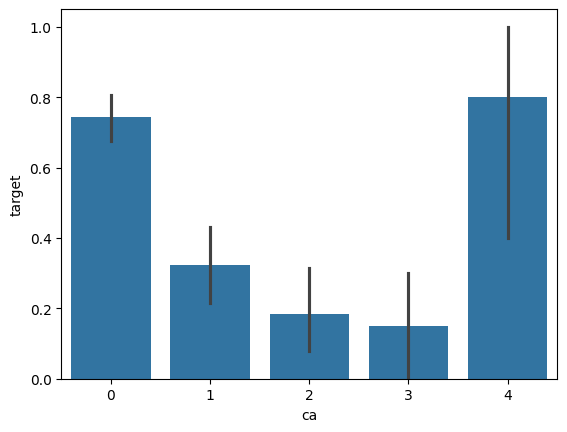

In [32]:
sns.barplot(x = df['ca'], y = target, data = df)

#### ca = 4 has a large number of heart patients

### Analysing thal column/feature

In [33]:
df['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

In [34]:
df['thal'].value_counts()

thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64

<Axes: xlabel='thal', ylabel='target'>

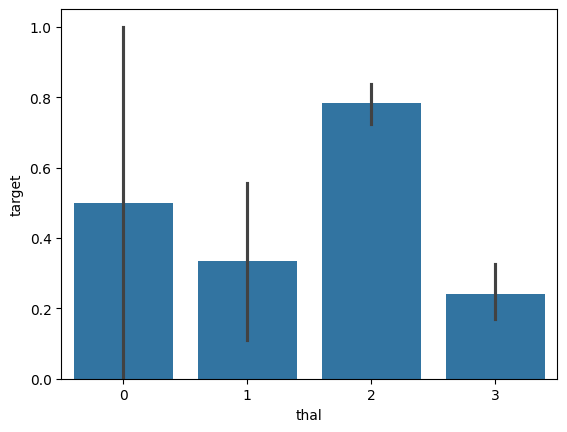

In [35]:
sns.barplot(x = df['thal'], y = target, data = df)

#### thal = 2 has a large number of heart patients

In [36]:
x_features = df.drop(columns='target', axis = 1)

y_target = df['target']

In [37]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [38]:
x_features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [39]:
y_target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### Splitting data into training and testing sets

In [40]:
train_x, test_x, train_y, test_y = train_test_split(x_features, y_target, test_size=0.2, stratify=y_target)

# stratify is used to make sure target vals (0 and 1) are equally distributed

In [41]:
train_x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
208,49,1,2,120,188,0,1,139,0,2.0,1,3,3
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1


In [42]:
test_x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3


In [43]:
train_y

276    0
190    0
176    0
208    0
127    1
      ..
252    0
172    0
294    0
292    0
66     1
Name: target, Length: 242, dtype: int64

In [44]:
test_y

170    0
74     1
301    0
45     1
195    0
      ..
297    0
287    0
14     1
197    0
185    0
Name: target, Length: 61, dtype: int64

In [45]:
print(x_features.shape, train_x.shape, test_x.shape)

(303, 13) (242, 13) (61, 13)


###

## Model Training

### Logistic Regression

- Odds = p/1-p  where p is the probability of success


In [46]:
# Creating an instance of logistic regression
model = LogisticRegression()        

# model training
model.fit(train_x, train_y)

d:\Programming lang\PYTHON\Python Interface\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation

In [47]:
# Accuracy on training data

regression_train_vals = model.predict(train_x)

regression_train_accuracy = accuracy_score(regression_train_vals, train_y)

In [48]:
print("Accuracy for training data: " , round(regression_train_accuracy*100,2))

Accuracy for training data:  85.54


In [49]:
# Accuracy on testing data

regression_test_vals = model.predict(test_x)
regression_test_accuracy = accuracy_score(regression_test_vals, test_y)

In [50]:
print("Accuracy for testing data: " , round(regression_test_accuracy*100, 2))

Accuracy for testing data:  83.61


###

### KNN

In [51]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=15)

### Model Evaulation

In [52]:
# Accuracy on training data

knn_train_vals = knn.predict(train_x)
knn_train_accuracy = accuracy_score(knn_train_vals, train_y)

In [53]:
print("Accuracy for training data: " , round(knn_train_accuracy*100, 2))

Accuracy for training data:  69.01


In [54]:
# Accuracy on testing data

knn_test_vals = knn.predict(test_x)
knn_test_accuracy = accuracy_score(knn_test_vals, test_y)

In [55]:
print("Accuracy for testing data: " , round(knn_test_accuracy*100, 2))

Accuracy for testing data:  65.57


###

### Naive Bayes

- Calculates the conditional probability of occurrence of an event based on the knowledge of the independent features.
- Works on the basis of bayes theorm which states that the probability of the happening of an event is dependent on the probabilities of the independent features.

        P(A|B) = P(B|A) * P(A) / P(B)                   In this case we are calculating the probability of A given B

In [56]:
nb = GaussianNB()
nb.fit(train_x,train_y)

GaussianNB()

### Model Evaluation

In [57]:
# Accuracy on training data

naive_train_vals = knn.predict(train_x)
naive_train_accuracy = accuracy_score(naive_train_vals, train_y)

In [58]:
print("Accuracy for training data: " , round(naive_train_accuracy*100, 2))

Accuracy for training data:  69.01


In [59]:
# Accuracy on testing data

knn_test_vals = knn.predict(test_x)
knn_test_accuracy = accuracy_score(knn_test_vals, test_y)

In [60]:
print("Accuracy for testing data: " , round(knn_test_accuracy*100, 2))

Accuracy for testing data:  65.57


###

### Decision Tree

In [61]:
# Creating an instance of DecisionTreeClassifier and trianing the model
# Experimentation

max_accuracy = 0   
for i in range(500):
    clf = DecisionTreeClassifier(random_state = i)
    clf.fit(train_x, train_y)
    pred = clf.predict(test_x)
    current_accuracy = round(accuracy_score(pred, test_y)*100,2)
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_random_state = i

# print("Best Random State: ", best_random_state)
# print("Best Accuracy: ", max_accuracy)

clf = DecisionTreeClassifier(random_state = best_random_state)
clf.fit(train_x, train_y)

DecisionTreeClassifier(random_state=47)

[Text(0.584375, 0.9583333333333334, 'x[2] <= 0.5\ngini = 0.496\nsamples = 242\nvalue = [110, 132]'),
 Text(0.346875, 0.875, 'x[11] <= 0.5\ngini = 0.407\nsamples = 116\nvalue = [83, 33]'),
 Text(0.21875, 0.7916666666666666, 'x[12] <= 2.5\ngini = 0.496\nsamples = 53\nvalue = [24, 29]'),
 Text(0.1125, 0.7083333333333334, 'x[7] <= 119.5\ngini = 0.367\nsamples = 33\nvalue = [8, 25]'),
 Text(0.0875, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.1375, 0.625, 'x[8] <= 0.5\ngini = 0.312\nsamples = 31\nvalue = [6, 25]'),
 Text(0.05, 0.5416666666666666, 'x[4] <= 316.0\ngini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(0.025, 0.4583333333333333, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.075, 0.4583333333333333, 'x[0] <= 61.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.225, 0.5416666666666666, 'x[7] <= 146.0\ngini = 0.486\nsamples = 12\nvalue

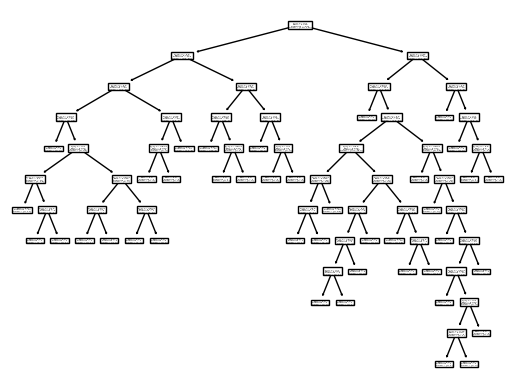

In [62]:
tree.plot_tree(clf)

### Model Evaluation

In [63]:
# Accuracy on training data

decision_train_vals = clf.predict(train_x)
decision_train_accuracy = accuracy_score(decision_train_vals, train_y)

In [64]:
print("Accuracy for training data: " , round(decision_train_accuracy*100, 2))

Accuracy for training data:  100.0


In [65]:
# Accuracy on testing data

decision_test_vals = clf.predict(test_x)
decision_test_accuracy = accuracy_score(decision_test_vals, test_y)

In [66]:
print("Accuracy for testing data: " , round(decision_test_accuracy*100, 2))

Accuracy for testing data:  80.33


###

### Random Forest

- No overfitting
- Less training time i.e. Predicts things that we don't want to predict
- High accuracy
- Estimates missing data

- More than 1 decision trees are used and the final decision is made by the majority of the trees

- Entropy: Measure of randomness or uncertainty
- Information Gain: Measure of decrease in entropy after a dataset is split
- leaf nodes: no further split
- root node: first node
- decision node: node that has children


In [67]:
# Creating an instance of RandomForestClassifier and trianing the model

max_accuracy = 0
for i in range(500):
    clf = RandomForestClassifier(random_state = i,max_depth=10)
    clf.fit(train_x, train_y)
    pred = clf.predict(test_x)
    current_accuracy = round(accuracy_score(pred, test_y)*100,2)
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_random_state = i

# print("Best Random State: ", best_random_state)
# print("Best Accuracy: ", max_accuracy)

clf = RandomForestClassifier(random_state = best_random_state)
clf.fit(train_x, train_y)

RandomForestClassifier(random_state=280)

### Model Evaluation

In [68]:
RandomForest_train_vals = clf.predict(train_x)
RandomForest_train_accuracy = accuracy_score(decision_train_vals, train_y)

In [69]:
print("Accuracy for training data: " , round(RandomForest_train_accuracy*100, 2))

Accuracy for training data:  100.0


In [70]:
RandomForest_test_vals = clf.predict(test_x)
RandomForest_test_accuracy = accuracy_score(RandomForest_test_vals, test_y)

In [71]:
print("Accuracy for testing data: " , round(RandomForest_test_accuracy*100, 2))

Accuracy for testing data:  86.89


###

### Using confusion Matrix

In [72]:
test_y

170    0
74     1
301    0
45     1
195    0
      ..
297    0
287    0
14     1
197    0
185    0
Name: target, Length: 61, dtype: int64

In [73]:
RandomForest_test_vals

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [74]:
cf_matrix = confusion_matrix(test_y, RandomForest_test_vals)
cf_matrix

# Order: TN, FP, FN, TP 

array([[21,  7],
       [ 1, 32]], dtype=int64)

In [75]:
tn, fp, fn, tp = cf_matrix.ravel()
print(tn, fp, fn, tp)

# Ravel function is used to extract the confusion matrix values

21 7 1 32


<Axes: >

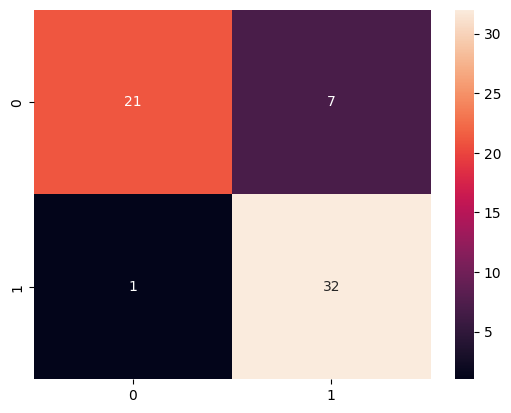

In [76]:
sns.heatmap(cf_matrix, annot=True)

# Annot displays labels

In [77]:
precision_recall_fscore_support(test_y, RandomForest_test_vals, average = 'macro')

(0.8875291375291375, 0.8598484848484849, 0.8644444444444443, None)

#### Since precision and recall are both high, we can say that our model is good

Using Confusion Matrix, we can calculate the accuracy, precision, recall, and F1 score so that we can evaluate the model performance.

- Confusion Matrix: It is used to evaluate the performance of a ```classification model``` by calculating the number of correct and incorrect predictions. It is a 2x2 matrix that contains 4 outputs of the model:



                     ACTUAL
        PREDICTED   [TP, FP]
                    [FN, TN]

        where:
        - TP: True Positive
        - TN: True Negative
        - FP: False Positive
        - FN: False Negative

        - TP + TN: Correct predictions
        - FP + FN: Incorrect predictions

        Can be used for multi-class classification as well

        sklearn.metrics import confusion_matrix

- Accuracy: Used to find the portion of the correct predictions.
            It is calculated by the formula:
                
                (TP + TN) / (TP + TN + FP + FN)

                where: ratio of current predictions to the total predictions

                from sklearn.metrices import accuracy_score

            Misleading when data is unevenly distributed

                    ex: number of dogs = 800
                        number of cats = 200

                        since number of dogs is more, the model will predict dogs more accurately than cats

                        now, let's say we have a even dataset of 200 dogs and 200 cats to be predicted.
                        In this case, the previous model will predict dogs more accurately than cats and the accuracy will be misleading.
                        In order to get the correct accuracy, we use precision, recall, and F1 score.

- Precision: used to find the correct positive predictions predicted posituve classes.
            It is calculated by the formula:
                
                TP / (TP + FP)

                where: true positive divided by the sum of true positive and false positive

- Recall: recall is a metric that measures how well a model identifies true positives.
                
                TN / (TN + FP)

                where: true negative divided by the sum of true negative and false positive

- F1 Score: used to find the balance between precision and recall
            used to evaluate the performance of binary classification models
            It is calculated by the formula:
                
                2 * (precision * recall) / (precision + recall)

                where: 2 multiplied by the product of precision and recall divided by the sum of precision and recall

                from sklearn.metrics import f1_score
            
            - Balance the value between precision and recall

            - Used in case of multiple parameters

            - In order to maintain the scores of precision and recall, we'll use lasso regression and Ridge regression


Steps to do so:
- Import the confusion matrix
- Calculate the confusion matrix
- Calculate the accuracy, precision, recall, and F1 score

### Conclusion

- Random Forest is a powerful algorithm that can be used for both classification and regression tasks.
- It is an ensemble learning method that combines multiple decision trees to make a more accurate prediction.

## Predicting the target

In [78]:
input_data = (60,1,0,125,258,0,0,141,1,2.8,1,1,3)

In [79]:
# changing input data to numpy array in order to reshape the data

input_data_as_numpy_array = np.array(input_data)
input_data_as_numpy_array

array([ 60. ,   1. ,   0. , 125. , 258. ,   0. ,   0. , 141. ,   1. ,
         2.8,   1. ,   1. ,   3. ])

In [80]:
# Reshaping because we are predicting for one instance/data point

reshaped_data = input_data_as_numpy_array.reshape(1,-1)
reshaped_data

# We rehaped the data because, the predict function expects a 2d array, in our case, we have a 1D array and that's why we have to reshape to get a 2d array with one row

array([[ 60. ,   1. ,   0. , 125. , 258. ,   0. ,   0. , 141. ,   1. ,
          2.8,   1. ,   1. ,   3. ]])

In [81]:
prediction = model.predict(reshaped_data)
if(prediction == 1):
    print("Heart Defect")
else:
    print("Healthy Heart")

Healthy Heart


d:\Programming lang\PYTHON\Python Interface\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [82]:
print(regression_test_accuracy)

0.8360655737704918


In [83]:
print(knn_test_accuracy)

0.6557377049180327


In [84]:
print(naive_train_accuracy)

0.6900826446280992


In [85]:
print(decision_test_accuracy)

0.8032786885245902


In [86]:
print(RandomForest_test_accuracy)

0.8688524590163934


In [87]:
# import pickle as pkl
# pkl.dump(clf, open('decision_trees.pkl', 'wb'))

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
from io import BytesIO
import base64

# Specify the age value
class plots():
    def __init__(self, df):
        self.df = df
        
    def chol_generate(self, chol_val):
        plt.figure(figsize=(10, 6))
        sns.histplot(x=df['chol'], hue=df['target'], palette="viridis", kde=True)
        plt.axvline(x=chol_val, color='red', linestyle='--', label=f'chol = {chol_val}')
        plt.xlabel('Cholestrol', fontsize=15)
        plt.title('Cholestrol distribution')
        plt.legend()

        img = BytesIO()
        plt.savefig(img, format='png')
        img.seek(0)
        
        # Encode the plot image as base64
        plot_url = base64.b64encode(img.getvalue()).decode()
        img.close()
        
        return plot_url

    def trestbps_generate(self, bps):
        plt.figure(figsize=(10, 6))
        sns.histplot(x=df['trestbps'], hue=df['target'], palette="viridis", kde=True)
        plt.axvline(x=bps, color='red', linestyle='--', label=f'trestbps = {bps}')
        plt.xlabel('trestbps', fontsize=15)
        plt.title('trestbps distribution')
        plt.legend()

        img = BytesIO()
        plt.savefig(img, format='png')
        img.seek(0)
        
        # Encode the plot image as base64
        
        plot_url = base64.b64encode(img.getvalue()).decode()
        img.close()

        return plot_url

    def thalach_generate(self, thalach_val):
        plt.figure(figsize=(10, 6))
        sns.histplot(x=df['thalach'], hue=df['target'], palette="viridis", kde=True)
        plt.axvline(x=thalach_val, color='red', linestyle='--', label=f'thalach = {thalach_val}')
        plt.xlabel('thalach', fontsize=15)
        plt.title('thalach distribution')
        plt.legend()

        img = BytesIO()
        plt.savefig(img, format='png')
        img.seek(0)
        
        # Encode the plot image as base64
        
        plot_url = base64.b64encode(img.getvalue()).decode()
        img.close()

        return plot_url

    def oldpeak_generate(self, oldpeak_val):
        plt.figure(figsize=(10, 6))
        sns.histplot(x=df['oldpeak'], hue=df['target'], palette="viridis", kde=True)
        plt.axvline(x=oldpeak_val, color='red', linestyle='--', label=f'oldpeak = {oldpeak_val}')
        plt.xlabel('oldpeak', fontsize=15)
        plt.title('oldpeak distribution')
        plt.legend()

        img = BytesIO()
        plt.savefig(img, format='png')
        img.seek(0)
        
        # Encode the plot image as base64
        
        plot_url = base64.b64encode(img.getvalue()).decode()
        img.close()

        return plot_url

obj = plots(df)    



'iVBORw0KGgoAAAANSUhEUgAAA+gAAAJYCAYAAADxHswlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAACz/0lEQVR4nOzdd5ydZZ3//9d9nz6990xJ74UQQgCpkSK4IKigq5QvFqTsIrZlFRTFH4oNC+BaAN2VRVFRwQWEQGiGEEJCep9kkumT6eXU+/79MZmBkDbltJl5Px+PeZA5576v6zOTzHDe52qGbds2IiIiIiIiIpJQZqILEBEREREREREFdBEREREREZGkoIAuIiIiIiIikgQU0EVERERERESSgAK6iIiIiIiISBJQQBcRERERERFJAgroIiIiIiIiIklAAV1EREREREQkCSigi4iIiIiIiCQBBXQRERERERGRJKCALiIiIiIiIpIEFNBFREREREREkoACuoiIiIiIiEgSUEAXERERERERSQIK6CIiIiIiIiJJQAFdREREREREJAkooIuIiIiIiIgkAQV0ERERERERkSSggC4iIiIiIiKSBBTQRURERERERJKAArqIiIiIiIhIElBAFxEREREREUkCCugiIiIiIiIiSUABXURERERERCQJKKCLiIiIiIiIJAEFdBEREREREZEkoIAuIiIiIiIikgQU0EVERERERESSgAK6iIiIiIiISBJQQBcRERERERFJAgroIiIiIiIiIklAAV1EREREREQkCSigi4iIiIiIiCQBBXQRERERERGRJKCALiIiIiIiIpIEFNBFREREREREkoACuoiIiIiIiEgSUEAXERERERERSQIK6CIiIiIiIiJJQAFdREREREREJAkooIuIiIiIiIgkAQV0ERERERERkSSggC4iIiIiIiKSBBTQRURERERERJKAArqIiIiIiIhIElBAFxEREREREUkCCugiIiIiIiIiSUABXUR

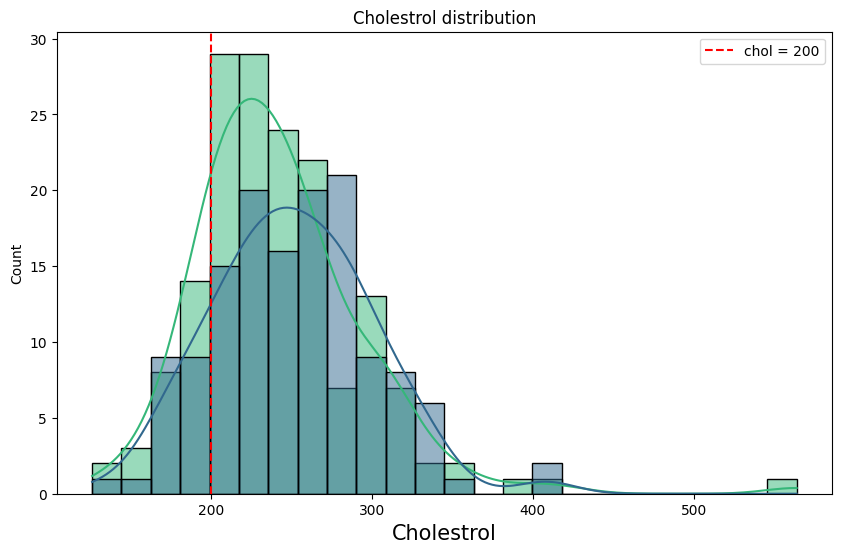

In [89]:
obj.chol_generate(200)

In [90]:
# import pickle as pkl

# pkl.dump(obj, open("graphs.pkl", 'wb'))

In [91]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
